In [2]:
from google.colab import files
uploaded = files.upload()
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


Saving spam.csv to spam (1).csv


In [9]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
import pandas as pd
df = pd.read_csv('spam.csv')
print(df.head())

print(df.shape)
print(df.columns)

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
(5572, 2)
Index(['Category', 'Message'], dtype='object')


In [14]:
import pandas as pd

# Load the dataset with the default encoding
df = pd.read_csv('spam.csv')

# Show column names
print(df.columns)


Index(['Category', 'Message'], dtype='object')


In [18]:
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = text.split()  # tokenize
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess_text)


In [19]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [20]:
# Train the classifier
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)


Accuracy: 0.9614349775784753

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.97      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Confusion Matrix:
 [[963   3]
 [ 40 109]]


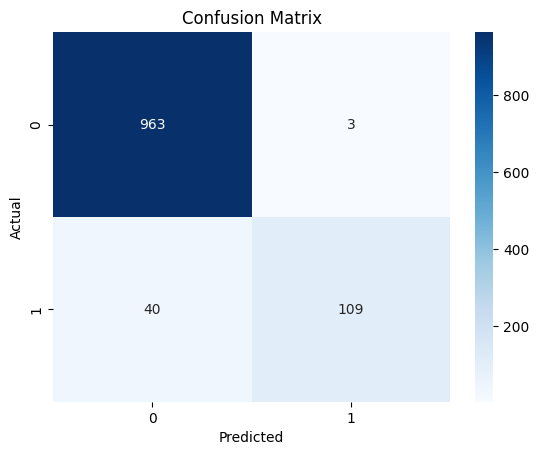

In [21]:
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
import pickle

# Save model
with open('spam_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
